In [ ]:
# Import dependencies
import random
import numpy as np
import torch
import torch.nn as nn

# You can find Alfredo's plotting code in plot_lib.py in this directory .
# Download it along with this assignment and keep it in the same directory.
from plot_lib import set_default, show_scatterplot, plot_bases

from matplotlib.pyplot import plot, title, axis

In [ ]:
# Set up your device 
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda else "cpu")

In [ ]:
# Set up random seed to 1008. Do not change the random seed.
# Yes, these are all necessary when you run experiments!
seed = 1008
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if cuda:
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

# 1. Full, slice, fill
Write a function `warm_up` that returns the 2D tensor with integers below. **Do not use any loops**.

```
1 2 1 1 1 1 2 1 1 1 1 2 1
2 2 2 2 2 2 2 2 2 2 2 2 2
1 2 1 1 1 1 2 1 1 1 1 2 1
1 2 1 3 3 1 2 1 3 3 1 2 1
1 2 1 3 3 1 2 1 3 3 1 2 1
1 2 1 1 1 1 2 1 1 1 1 2 1
2 2 2 2 2 2 2 2 2 2 2 2 2
1 2 1 1 1 1 2 1 1 1 1 2 1
1 2 1 3 3 1 2 1 3 3 1 2 1
1 2 1 3 3 1 2 1 3 3 1 2 1
1 2 1 1 1 1 2 1 1 1 1 2 1
2 2 2 2 2 2 2 2 2 2 2 2 2
1 2 1 1 1 1 2 1 1 1 1 2 1
```


Hint: Use `torch.full`, `torch.fill_`, and the slicing operator.

In [ ]:
def warm_up():
  x = torch.full((13, 13),1).to(device)
  x[1,:] = 2
  x[1+5,:] = 2
  x[1+10,:] = 2
  x[:,1] = 2
  x[:,1+5] = 2
  x[:,1+10] = 2
  x[1,:] = 2
  x[1+5,:] = 2
  x[1+10,:] = 2
  x[:,1] = 2
  x[:,1+5] = 2
  x[:,1+10] = 2
  x[3:5,3:5] = 3
  x[3:5,8:10] = 3
  x[8:10,3:5] = 3
  x[8:10,8:10] = 3

  return x
  #  raise NotImplementedError()

# Uncomment line below once you implement this function. 
print(warm_up())

tensor([[1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 3, 3, 1, 2, 1, 3, 3, 1, 2, 1],
        [1, 2, 1, 3, 3, 1, 2, 1, 3, 3, 1, 2, 1],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 3, 3, 1, 2, 1, 3, 3, 1, 2, 1],
        [1, 2, 1, 3, 3, 1, 2, 1, 3, 3, 1, 2, 1],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1]])


# 2. To Loop or not to loop

The motivation for the following three sub-questions is to get you to think critically about how to write your deep learning code. These sorts of choices can make the difference between tractable and intractable model training.

## 2.1. `mul_row_loop`
Write a function `mul_row_loop`, using python loops with simple indexing but no advanced indexing/slicing, that receives a 2D tensor as input and returns a tensor of same size that is 
- equal to the input on the first row
- 2 times the input's second row on the second row
- 3 times the input's third row on the third row
- etc..

For instance:
```
>>> t = torch.full((4, 8), 2.0)
>>> t
tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
[2., 2., 2., 2., 2., 2., 2., 2.],
[2., 2., 2., 2., 2., 2., 2., 2.],
[2., 2., 2., 2., 2., 2., 2., 2.]])
>>> mul_row(t)
tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
[4., 4., 4., 4., 4., 4., 4., 4.],
[6., 6., 6., 6., 6., 6., 6., 6.],
[8., 8., 8., 8., 8., 8., 8., 8.]])
```

In [ ]:
x = torch.full((3,2),1)
print(type(x.size()[0]))

<class 'int'>


In [ ]:
def mul_row_loop(input_tensor):
  n_rows = input_tensor.size()[0]
  x = input_tensor.clone().detach()
  for i in range(1,n_rows):
    x[i] = (i+1)*x[i,:]
  return x

t = torch.full((4, 8), 2.0)
import time
st = time.time()
print(mul_row_loop(t))
et = time.time()-st
print(et)

tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
        [4., 4., 4., 4., 4., 4., 4., 4.],
        [6., 6., 6., 6., 6., 6., 6., 6.],
        [8., 8., 8., 8., 8., 8., 8., 8.]])
0.11763143539428711


# 2.2. `mul_row_fast`
Write a second version of the same function named `mul_row_fast` which uses tensor operations and no looping.

**Hint**: Use broadcasting and `torch.arange`, `torch.view`, and `torch.mul`.

In [ ]:
x = torch.zeros(3).view(1, 3)
print(x)  
y = torch.arange(1,3).view(2, 1)
print(y)
a, b = torch.broadcast_tensors(x, y)
print(a)
print(b)

tensor([[0., 0., 0.]])
tensor([[1],
        [2]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1, 1, 1],
        [2, 2, 2]])


In [ ]:
def mul_row_fast(input_tensor):
    nr = input_tensor.size()[0]
    nc = input_tensor.size()[1]
    y = torch.arange(1,nr+1).view(nr,1)
    b = torch.broadcast_to(y, (nr, nc))
    result = torch.mul(b,input_tensor)
    return result

import time

st = time.time()
print(mul_row_fast(t))
et = time.time()-st
print(et)

tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
        [4., 4., 4., 4., 4., 4., 4., 4.],
        [6., 6., 6., 6., 6., 6., 6., 6.],
        [8., 8., 8., 8., 8., 8., 8., 8.]])
0.005599260330200195


# 2.3. `times`
Write a function `times` which takes a 2D tensor as input and returns the run times of `mul_row_loop` and `mul_row_fast` on this tensor, respectively. Use `time.perf_counter`.

Use `torch.ones` to create a 2D tensor of size (1000, 400) full of ones and run `times` on it (there should be more than two orders of magnitude difference).

In [ ]:
from time import perf_counter
def times(input_tensor):
    st1 = perf_counter()
    a = mul_row_loop(input_tensor)
    t1 = perf_counter() - st1
    st2 = perf_counter()
    b = mul_row_fast(input_tensor)
    t2 = perf_counter() - st2
    return t1,t2
    raise NotImplementedError()

# Uncomment lines below once you implement this function. 
input_tensor = torch.ones(1000, 400)
time_1, time_2 = times(input_tensor)
print('{}, {}'.format(time_1, time_2))

0.014698680999970293, 0.003898738999964735


# 3. Non-linearities

In this section, we explore similar concepts to Lab 1 and get comfortable initializing modules like nn.Linear and using non-linearities in PyTorch.

## 3.1. ReLU
ReLU (Rectified Linear Unit) is a non-linear activation fuction defined as:

$$y = \mathrm{max}(0,x)$$

Define a fully connected neural network `linear_fc_relu` which:
- takes 2 dimensional data as input and passes it through linear modules (`torch.nn.Linear`)
- has one hidden layer of dimension 5 
- has output dimension of 2
- has ReLu as an activation function

Create a tensor with input data $X$ of size (100, 2) using `torch.randn`. 

Following the example in https://github.com/Atcold/pytorch-Deep-Learning-Minicourse/blob/master/02-space_stretching.ipynb, visualize the output of passing `X` through the neural network `linear_fc_relu`.

You can find Alfredo's plotting code in plot_lib.py in this directory. Download it along with this assignment and keep it in the same directory.

In [ ]:
# Input data
n_samples = 100
X = torch.randn(n_samples,2).to(device)
colors = X[:, 0]

tensor([[0.9066, 0.3459],
        [0.9322, 0.1781],
        [0.9839, 0.2219],
        [0.4295, 0.5597],
        [0.9109, 0.9522]])


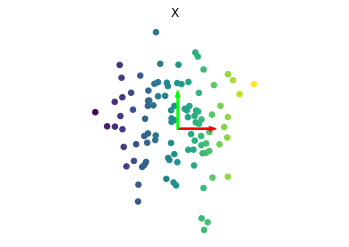

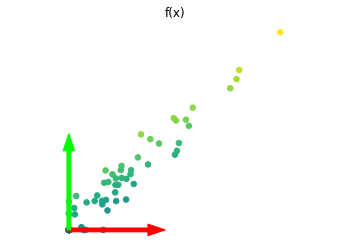

In [ ]:
# create 1-layer neural networks with ReLU activation
# linear_fc_relu = TODO
import torch.nn as nn
NL = nn.ReLU()
n_hidden = 5
linear_fc_relu = nn.Sequential(
        nn.Linear(2, n_hidden,bias=False), 
        NL)
linear_fc_relu.to(device)
W = torch.rand((n_hidden,2))
print(linear_fc_relu[0].weight.data.copy_(W))
with torch.no_grad():
  Y = linear_fc_relu(X).detach()

# Visualize: TODO
show_scatterplot(X, colors, title='X')
OI = torch.cat((torch.zeros(2, 2), torch.eye(2))).to(device)
plot_bases(OI)
show_scatterplot(Y, colors, title='f(x)')
plot_bases(OI)


## 3.2. Sigmoid
The sigmoid function is another popular choice for a non-linear activation function which maps its input to values in the interval $(0,1)$. It is formally defined as:

$$\sigma(x) = \frac{1}{1+ exp[-x]}$$

Define a new neural network `linear_fc_sigmoid` which is the same architecture as in part `3.1.` but with a sigmoid unit instead of ReLU. 

Using the same $X$ as in part `3.1`, visualize the output of passing `X` through the neural network `linear_fc_sigmoid`.

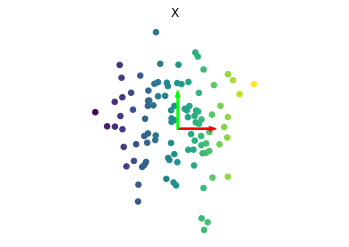

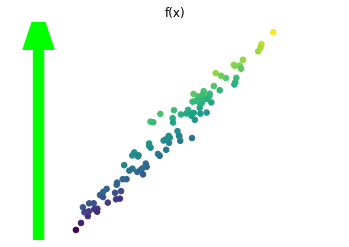

In [ ]:
# create 1-layer neural networks with Sigmoid activation
# linear_fc_sigmoid = TODO
linear_fc_sigmoid = nn.Sequential(
    nn.Linear(2,n_hidden,bias=False),
    nn.Sigmoid()
) 
linear_fc_sigmoid[0].weight.data.copy_(W)
with torch.no_grad():
  Y2 = linear_fc_sigmoid(X).detach()
  
show_scatterplot(X, colors, title='X')
plot_bases(OI)
show_scatterplot(Y2, colors, title='f(x)')
plot_bases(OI)

# Visualize: TODO